# Tensorflow: Classify images of clothing

https://www.tensorflow.org/tutorials/keras/classification

This is a clever example.

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


Now to import the data.

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
class_names = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's take a look at one of the images

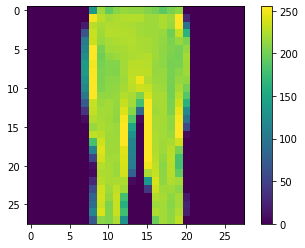

Trouser


In [13]:
plt.figure()
plt.imshow(train_images[54321])
plt.colorbar()
plt.grid(False)
plt.show()

print(class_names[train_labels[54321]])

Now we need to rescale the image data to (0,1).

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Let's display 25 images to make sure we're good here.

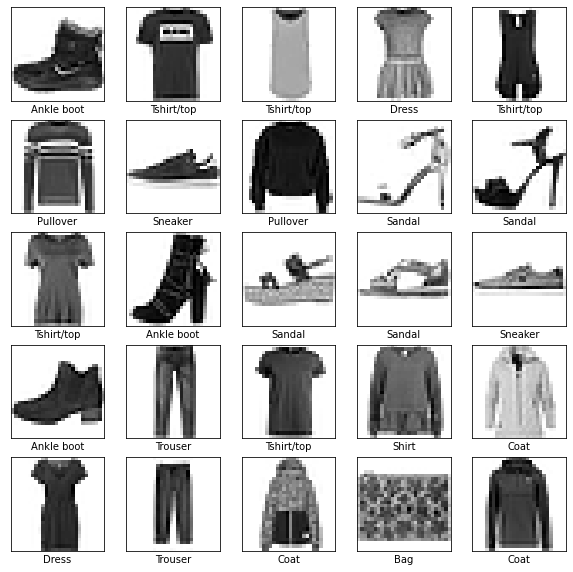

In [19]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Looking good!  Let's work on a model.

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Now we need to *compile* the model; this is where we add a loss function, an optimizer, and note which metrics we want to track.

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Now we fit the model.

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 683us/step - loss: 0.4961 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 1s 689us/step - loss: 0.3764 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 1s 676us/step - loss: 0.3382 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 1s 633us/step - loss: 0.3123 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 1s 676us/step - loss: 0.2958 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 1s 689us/step - loss: 0.2805 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 1s 753us/step - loss: 0.2677 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 1s 733us/step - loss: 0.2577 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.2465 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 2s 806u

Up to 91% on the training set -- not bad!  But how does it do on the validation set?

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: {}'.format(test_acc))

313/313 - 0s - loss: 0.3295 - accuracy: 0.8837

Test accuracy: 0.8837000131607056


Now we can use this model to make predictions.  The output we get from the model is/are *logits*: [the eector of raw (non-normalized) predictions made by a model](https://developers.google.com/machine-learning/glossary#logits).  In a multi-class classification problem, we typically take logits and pass them to the softmax function, which converts them to probabilities.  

In [28]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_images)

Let's look at the first prediction:

In [31]:
predictions[0]

array([6.18542941e-08, 2.59618438e-10, 9.02326769e-10, 1.22402245e-11,
       2.21182184e-09, 3.98346921e-04, 3.22760854e-07, 9.72488336e-03,
       7.11895439e-07, 9.89875615e-01], dtype=float32)

The highest value is the one the model is most confident in:

In [33]:
np.argmax(predictions[0]), class_names[np.argmax(predictions[0])]

(9, 'Ankle boot')

Is that right?

In [34]:
test_labels[0]

9

Now let's set up some ways to graph our predictions.

Our first helper function plots an image of the image that was used for prediction; it's labelled with the predicted label, the percent confidence, and color-coded to show correctness (blue) or wrongness (red).

In [49]:
def plot_image(i, predictions_array, true_labels, img):
    """Plot an image we made a prediction about, with some details about the prediction.
    
    Args:
    
    i: the index of the image we made a prediction of; used to index img.
    predictions_array: array of predictions for a particular image.
    true_labels:  the array of ground truth labels for the testing images
    img: all the images used for testing (ie, images we made predictions about).
    """
    # Because we're getting *all* the labels and images, use i 
    # to get the single label/image we're concerned about.
    true_label, img = true_labels[i], img[i]
    
    # Turn off distracting ticks & lines
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # Show the image in black & white
    plt.imshow(img, cmap=plt.cm.binary)
    
    # Get the label with the most confident prediction
    predicted_label = np.argmax(predictions_array)
    # Color-code the label depending on correctness
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    # Create the x label
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
              color=color)

Next up, a helper function to plot the predictions that were made -- again, color-coded depending on correctness.

In [81]:
def plot_value_array(i, predictions_array, true_labels):
    """Plot the array of predictions made for a particular image:
    
    Args:
    i: index of the image we made a prediction for; used to index predictions_array and true_label.
    predictions_array: Array of predictions for a particular image.
    true_labels: the array of ground truth labels for the testing images
    """
    # Get the true label
    true_label = true_labels[i]
    
    # Set grids and ticks appropriately
    plt.grid(True)
    plt.xticks(range(10), class_names, rotation=90)
    # plt.xticks(class_names)
    # plt.yticks([])
    
    # Plot the predictions with a default color.
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    
    # Set the y limit appropriately
    plt.ylim([0, 1])
    
    # Get the predicted label
    predicted_label = np.argmax(predictions_array)
    
    # Set color appropriately
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Now let's look at some predictions!

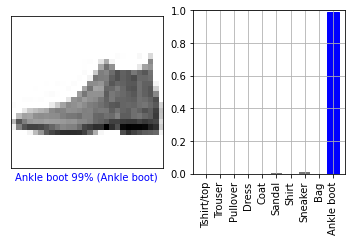

In [83]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

How about another one?

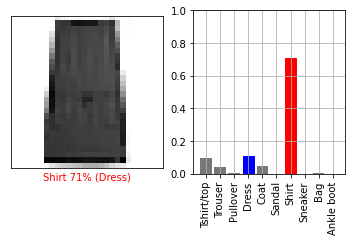

In [84]:
i = 42
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

Very wrong. 

Let's plot some more:

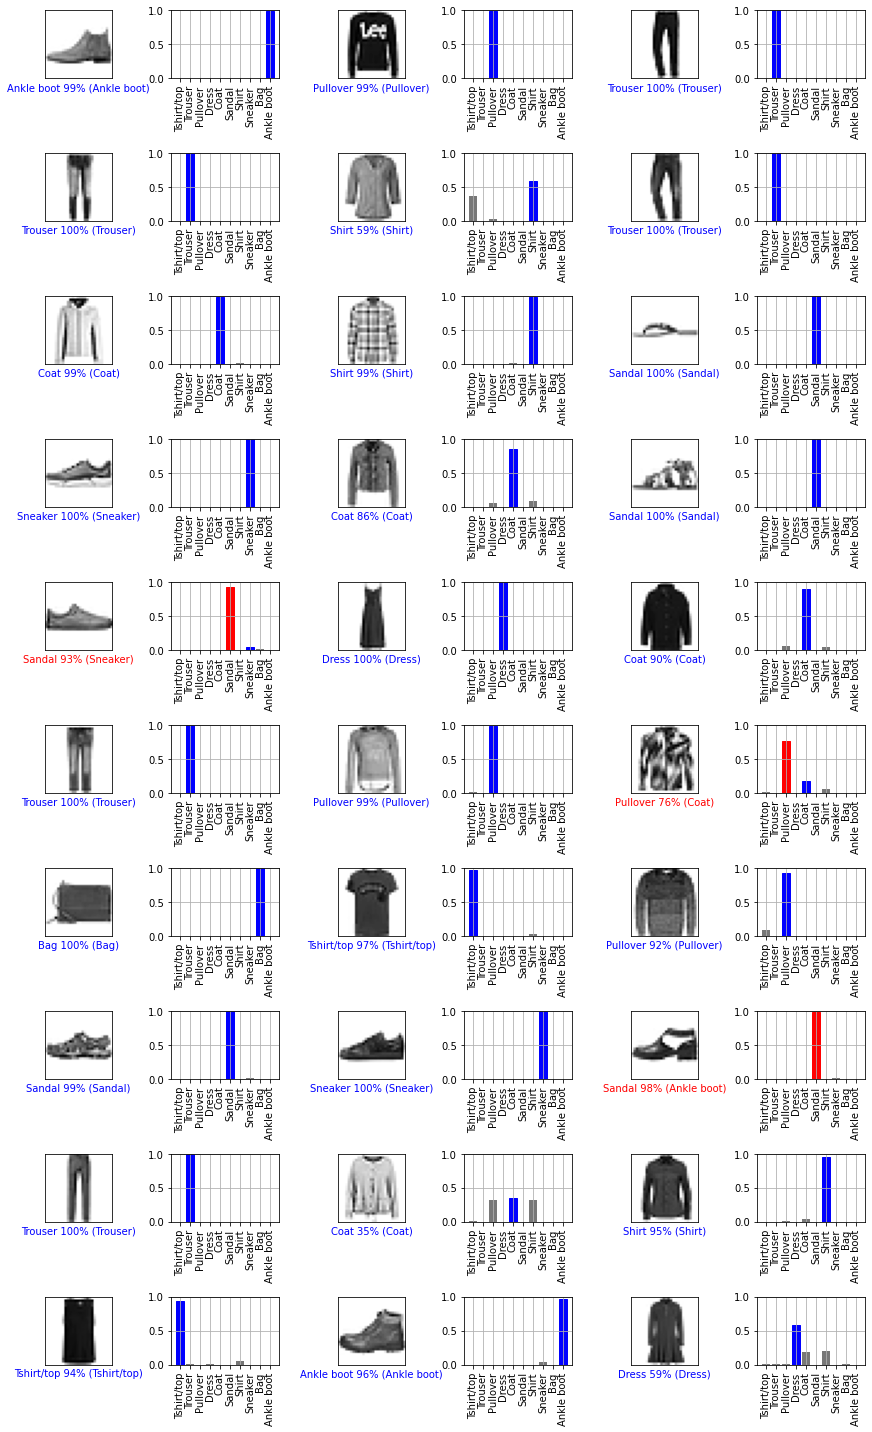

In [85]:
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Let's see if we can plot a confusion matrix.  Much help from [the matplotlib documentation](https://matplotlib.org/3.3.2/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py).

Text(0.5, 1.0, 'Confusion matrix.\nColumns=predictions, Rows=true')

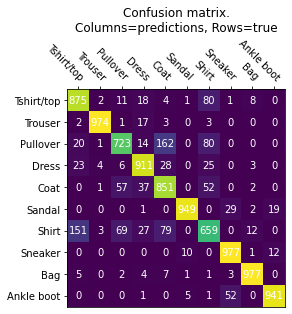

In [168]:
# Convenience
num_classes = len(class_names)

fig, ax = plt.subplots()
im = ax.imshow(my_confusion_matrix)

ax.set_xticks(range(num_classes))
ax.set_yticks(range(num_classes))

ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Set the x labels to go on top
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Set the x labels to be rotated for clarity
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right", rotation_mode="anchor")

plt.set_ylabel="True"
plt.set_xlabel="Predicted"

for i in range(num_classes):
    for j in range(num_classes):
        # Need to have `numpy()` here to turn it into a number
        text = ax.text(j, i, my_confusion_matrix[i, j].numpy(), ha="center", va="center", color="w")
        
ax.set_title("Confusion matrix.\nColumns=predictions, Rows=true")

So!  

- Shirts, tshirts, pullovers, dresses, and coats are hard to tell apart
- Ditto sneakers, ankle boots and sandles
- The colour scale could use adjusting, but this is not bad.



Now we'll make a prediction about a single image.  Note that `tf.keras` models work on batches -- so we need to make a list out of our single image.

In [174]:
img = test_images[1234]
print("Shape before: {}".format(img.shape))

# np.expand is like PyTorch's unsqueeze()
img = np.expand_dims(img, 0)
print("Shape after: {}".format(img.shape))

Shape before: (28, 28)
Shape after: (1, 28, 28)


In [175]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.2125534e-04 5.6348221e-05 1.6082725e-01 3.6208064e-04 7.4592912e-01
  1.6757283e-10 9.2691734e-02 1.2327268e-08 1.1482672e-05 5.9084363e-07]]


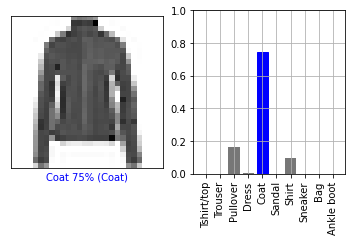

In [187]:
# Need to do this to match our earlier code...really calls for a refactoring.
labels_single = np.expand_dims(np.array(test_labels[1234]), 0)

plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(0, predictions_single, labels_single, img)
plt.subplot(1, 2, 2)
# Again: need to do this to match our earlier code...really calls for a refactoring.
plot_value_array(0, predictions_single[0], labels_single)

Okay: so can we convert this to work on a Coral dev board?

I'm going to start with post-training quantization, as [the documentation](https://www.tensorflow.org/model_optimization/guide/quantization/training) says its easier, and [the other documentation](https://coral.ai/docs/edgetpu/models-intro/#quantization) says quantization-aware training is still new in TF 2.

I'll be following along with the instructions in [this notebook](https://colab.research.google.com/github/google-coral/tutorials/blob/master/retrain_classification_ptq_tf2.ipynb).

You need to re-train the data with a conversion dataset.  I'm going to take part of the original training dataset and hive it off for conversion.

In [243]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [244]:
train_images.shape

(60000, 28, 28)

In [245]:
splitting_point = 50000

conversion_images = train_images[splitting_point:]
conversion_labels = train_labels[splitting_point:]

train_images = train_images[:splitting_point]
train_labels = train_labels[:splitting_point]

train_images.shape, train_labels.shape, conversion_images.shape, conversion_labels.shape

((50000, 28, 28), (50000,), (10000, 28, 28), (10000,))

In [246]:
train_images = train_images / 255.0
conversion_images = conversion_images / 255.0
test_images = test_images / 255.0

# Explicitly cast these to float32, rather than the default float64
# See https://github.com/tensorflow/tensorflow/issues/34296 for details.

train_images = tf.dtypes.cast(train_images, tf.float32)
conversion_images = tf.dtypes.cast(conversion_images, tf.float32)
test_images = tf.dtypes.cast(test_images, tf.float32)

In [247]:
model_for_tpu = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [248]:
model_for_tpu.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

model_for_tpu.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 1s 684us/step - loss: 0.5126 - accuracy: 0.8199
Epoch 2/10
1563/1563 [==============================] - 1s 736us/step - loss: 0.3857 - accuracy: 0.8624
Epoch 3/10
1563/1563 [==============================] - 1s 693us/step - loss: 0.3459 - accuracy: 0.8752
Epoch 4/10
1563/1563 [==============================] - 1s 721us/step - loss: 0.3188 - accuracy: 0.8821
Epoch 5/10
1563/1563 [==============================] - 1s 677us/step - loss: 0.2975 - accuracy: 0.8900
Epoch 6/10
1563/1563 [==============================] - 1s 668us/step - loss: 0.2855 - accuracy: 0.8958
Epoch 7/10
1563/1563 [==============================] - 1s 691us/step - loss: 0.2741 - accuracy: 0.8998
Epoch 8/10
1563/1563 [==============================] - 1s 707us/step - loss: 0.2597 - accuracy: 0.9034
Epoch 9/10
1563/1563 [==============================] - 1s 698us/step - loss: 0.2499 - accuracy: 0.9070
Epoch 10/10
1563/1563 [==============================] - 1s 697u

In [249]:
test_loss, test_acc = model_for_tpu.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 0s - loss: 0.3396 - accuracy: 0.8823
Test accuracy: 0.8823000192642212


Okay, model trained.  Now to convert!

In [250]:
# Zeroth: create a TF Dataset for our conversion images
def conversion_data_gen():
    conversion_dataset = tf.data.Dataset.from_tensor_slices(conversion_images)
    dataset_size = len(conversion_images)
    for i in range(dataset_size):
        image = next(iter(conversion_dataset))
        yield [image]

# First, create a converter...
converter = tf.lite.TFLiteConverter.from_keras_model(model)


# Enable quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Set the representative dataset
converter.representative_dataset = conversion_data_gen

# This ensures that if any ops can't be quantized, we'll throw an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# For full integer quantization; though supported types defaults to int8 only, we'll explicitly declare it.
converter.target_spec.supported_types = [tf.int8]

# Set input & output tensors to uint8 (added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

# Now convert
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpn_bssylb/assets


INFO:tensorflow:Assets written to: /tmp/tmpn_bssylb/assets


# Problems I ran into:

## Conversion wants a generator, not a dataset

The notebook is right when it insists on wrapping the dataset in a yield.  I'm not entirely sure what's going on there.


## `Cannot set tensor` when converting `flatten_input`

Full backtrace:
```
ValueError: Cannot set tensor: Got value of type NOTYPE but expected type FLOAT32 for input 0, name: flatten_input 
```

At first, I looked at [this StackExchange answer](https://stackoverflow.com/questions/62580548/is-the-keras-function-flatten-supported-by-tensorflow-lite); however, it didn't seem relevant.  Next I found 
 [this Github issue](https://github.com/tensorflow/tensorflow/issues/34296), which explained the error in terms of hidden data types:
 
 > Conversion is successful if the data type is float32. If the data type of input data is float64, then it will throw ValueError: Cannot set tensor: Got value of type NOTYPE but expected type FLOAT32 for input 0, name: flatten_input which is not clear. Most of the keras models In Tensorflow website under tutorials are with float64 datatype. So, if the user try to convert them into tf_lite model, they will end up in this ValueError. I think we need to update the Error description. Instead of showing NOTYPE, may it is better to use float64 or other data types that are not compatible.
 
Looking at `train_images.dtype` showed that they were, in fact, float64.

The response in that ticket:

> float64 isn't supported in the TFLite interpreter. The supported types are available here.
> Because it's not trivial to change the error message that is shown here without adding support for float64, I am closing this issue.

Adding this bit of code did the trick:

```
# Explicitly cast these to float32, rather than the default float64
# See https://github.com/tensorflow/tensorflow/issues/34296 for details.

train_images = tf.dtypes.cast(train_images, tf.float32)
conversion_images = tf.dtypes.cast(conversion_images, tf.float32)
test_images = tf.dtypes.cast(test_images, tf.float32)
```

And after that, I was able to convert!

Now time to write it out.

In [251]:
with open('fashion_mnist_v0.0.1_quant.tflite', 'wb') as f:
    f.write(tflite_model)

Let's compare the accuracy.

In [263]:
def set_input_tensor(interpreter, input):
    input_details = interpreter.get_input_details()[0]
    tensor_index = input_details['index']
    input_tensor = interpreter.tensor(tensor_index)()[0]
    # Inputs for the TFLite model must be uint8, so we quantize our input data.
    scale, zero_point = input_details['quantization']
    input_tensor[:, :] = np.uint8(input / scale + zero_point)
    
def classify_image(interpreter, input):
    set_input_tensor(interpreter, input)
    interpreter.invoke()
    output_details = interpreter.get_output_details()[0]
    output = interpreter.get_tensor(output_details['index'])
    # Outlputs from the TFLite model are unit8, so we have to dequantize the results
    scale, zero_point = output_details['quantization']
    output = scale * (output - zero_point)
    top_1 = np.argmax(output)
    return top_1

interpreter = tf.lite.Interpreter('fashion_mnist_v0.0.1_quant.tflite')
interpreter.allocate_tensors()

batch_prediction = []
for i in range(len(test_images)):
    prediction = classify_image(interpreter, test_images[i])
    batch_prediction.append(prediction)
    
tflite_accuracy = tf.keras.metrics.Accuracy()
tflite_accuracy(batch_prediction, test_labels)
print("Quant TF Lite accuracy: {:.3%}".format(tflite_accuracy.result()*100))

Quant TF Lite accuracy: 76.000%


Note:  [tf.keras.metrics.Accuracy()](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) returns in the range 0-1, not 0-100.  Originally I thought my accuracy was 0.76%...

How does this compare with the original model?

In [264]:
test_loss, test_acc = model_for_tpu.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: {}'.format(test_acc))

313/313 - 0s - loss: 0.3396 - accuracy: 0.8823

Test accuracy: 0.8823000192642212


Hm -- I'm going to assume that's in line with what [the original notebook](https://colab.research.google.com/github/google-coral/tutorials/blob/master/retrain_classification_ptq_tf2.ipynb#scrollTo=srOYhMYfx9XH) calls "not very much accuracy drop".

Gahh...the edgetpu compiler is only available on Debian systems, and only on x86_64 architecture. (╯°□°)╯︵ ┻━┻

Doing this on my home machine.

In [265]:
!ls -l

total 712
-rw-r--r--. 1 aardvark aardvark 148000 Nov 10 15:07 fashion_mnist_v0.0.1_quant_edgetpu.tflite
-rw-r--r--. 1 aardvark aardvark 104480 Nov 10 14:11 fashion_mnist_v0.0.1_quant.tflite
-rw-r--r--. 1 aardvark aardvark 469123 Nov 10 15:03 mnist_fashion.ipynb


# TODO

- Try running this on coral board
- Try putting flask in front of this
- Try putting a decent HTML UI in front of the API